# 0.) Import and Clean data

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
df = pd.read_csv('bank-additional-full (1).csv', sep=';')


print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

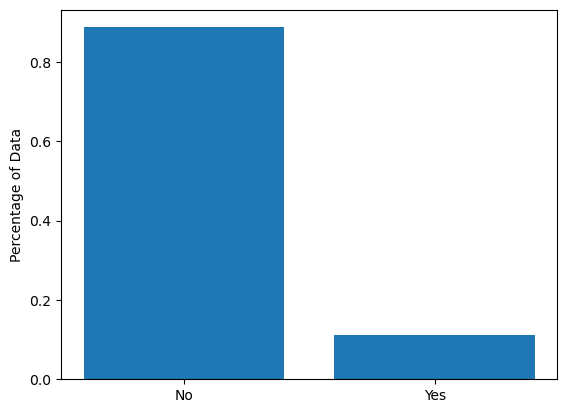

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [12]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.165\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.491\ngini = 0.299\nsamples = 20023\nvalue = [16367, 3656]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.114\nsamples = 10601\nvalue = [9959, 642]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.097\nsamples = 10397\nvalue = [9868, 529]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.494\nsamples = 204\nvalue = [91, 113]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.322\ngini = 0.435\nsamples = 9422\nvalue = [6408, 3014]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.489\nsamples = 6860\nvalue = [3934, 2926]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.066\nsamples = 2562\nvalue = [2474, 88]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.321\ngini = 0.417\nsamples = 31137\nvalue = [9213, 21924]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.827\ngini = 0.337\nsamples = 25616\nvalue = [5490, 20126]\nclass 

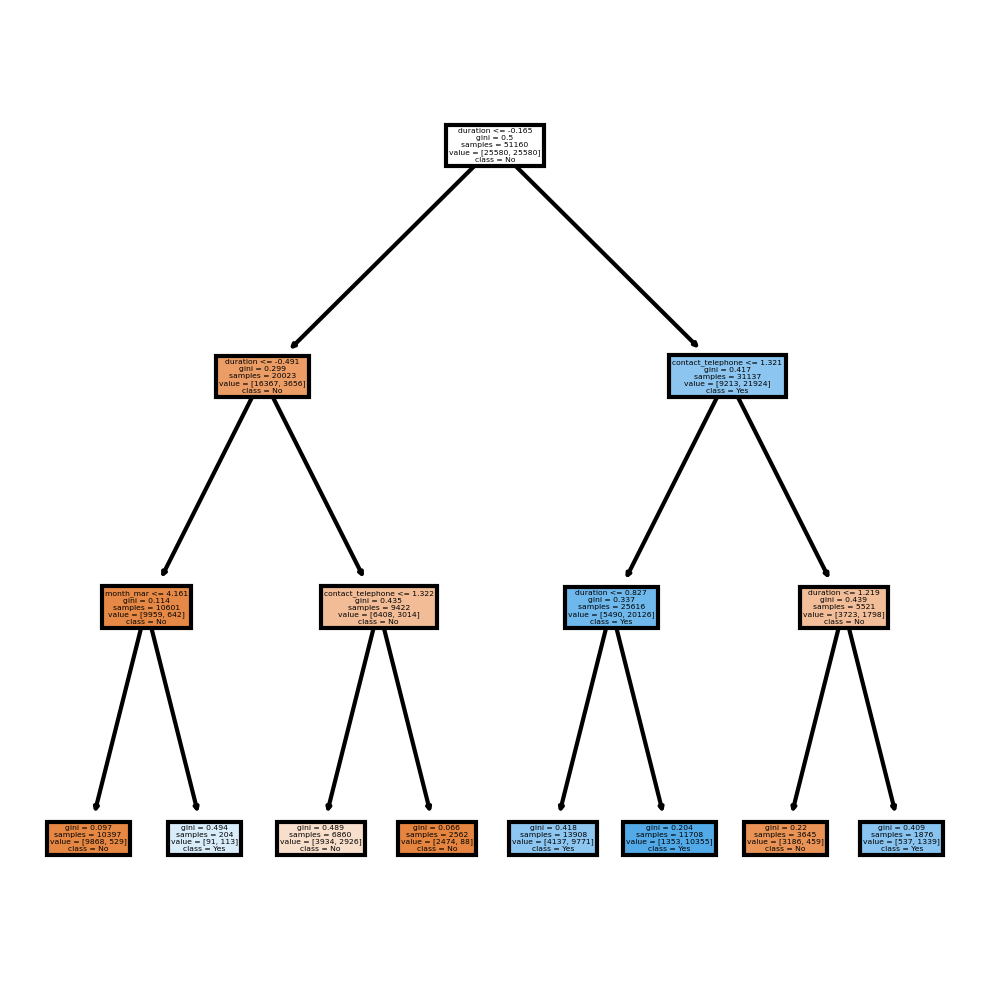

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled=True, feature_names=list(X.columns), class_names=["No", "Yes"])

#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [14]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

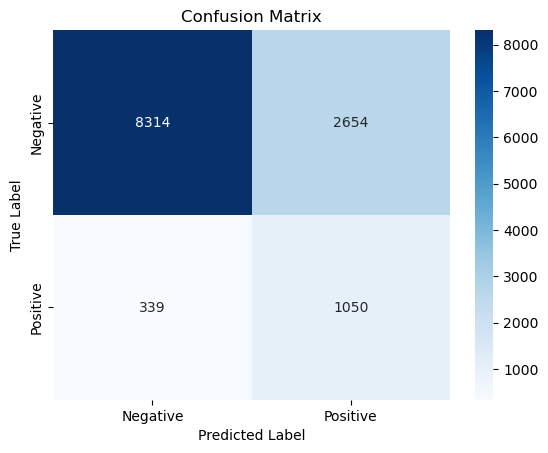

In [15]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [16]:
dtree = DecisionTreeClassifier(max_depth=3)

In [17]:
Bagging = BaggingClassifier(estimator = dtree,
                  n_estimators = 100,
                  max_samples = .5,
                  max_features = 1.)
Bagging.fit(X_smote, y_smote)


/Users/santiagonaranjo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                  max_samples=0.5, n_estimators=100)

In [18]:
dtree = DecisionTreeClassifier(max_depth=3)

bagging = BaggingClassifier(
    estimator=dtree, 
    n_estimators=100, 
    max_samples=0.5, 
    max_features=1.0,
    random_state=42
)

bagging.fit(X_smote, y_smote)

y_pred_bagging = bagging.predict(X_test)
cm_bagging = confusion_matrix(y_test, y_pred_bagging)

/Users/santiagonaranjo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


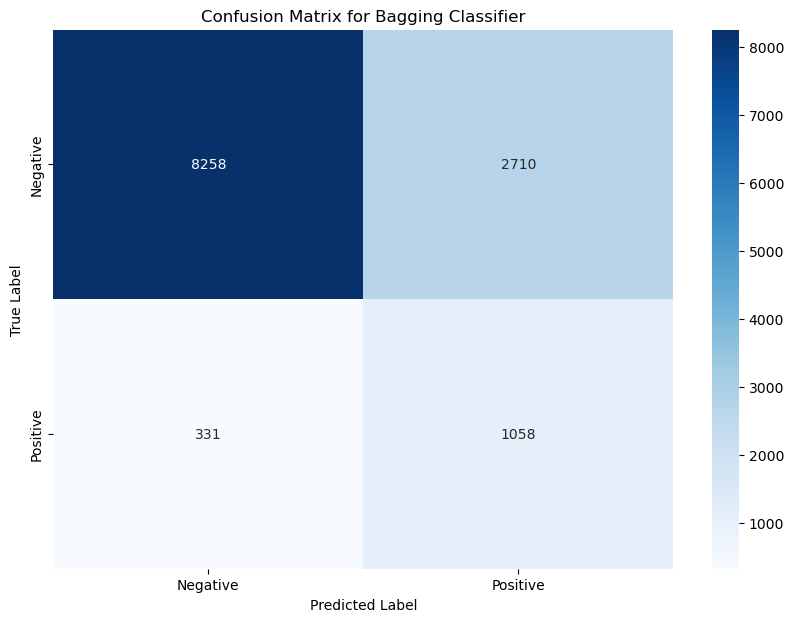

In [19]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Bagging Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [20]:
from sklearn.ensemble import AdaBoostClassifier

/Users/santiagonaranjo/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/santiagonaranjo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


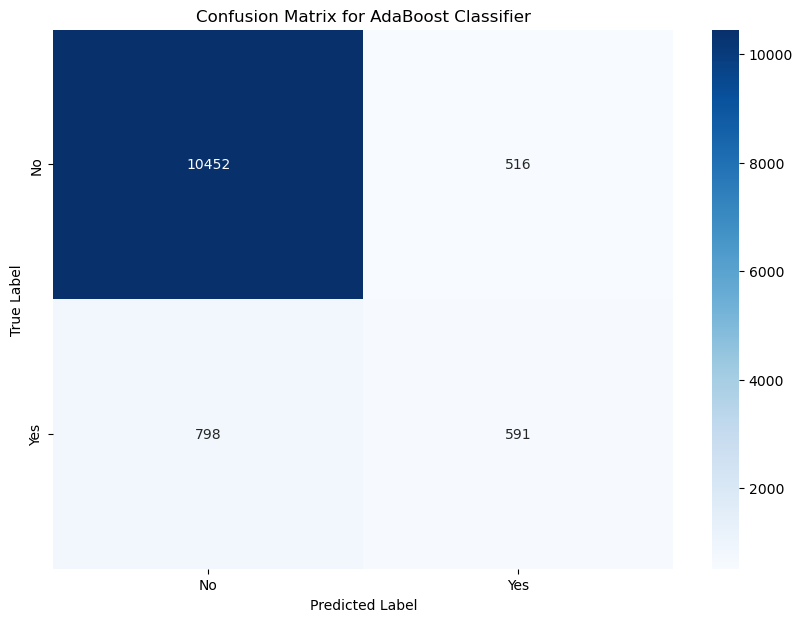

In [21]:

ada_boost = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=100,
    random_state=42
)

ada_boost.fit(X_smote, y_smote)

y_pred_ada = ada_boost.predict(X_test)

cm_ada = confusion_matrix(y_test, y_pred_ada)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_ada, annot=True, fmt="d", cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# 5.) Train a logistic regression on the decission Tree, Boosted Tree , badge tree

Interpret coeficients and significance

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [24]:
dtree.fit(X_smote, y_smote)

ada_boost.fit(X_smote, y_smote)

bagging.fit(X_smote, y_smote)


dtree_train_pred = dtree.predict(X_smote)
dtree_test_pred = dtree.predict(X_test)

ada_train_pred = ada_boost.predict(X_smote)
ada_test_pred = ada_boost.predict(X_test)


bagging_train_pred = bagging.predict(X_smote)
bagging_test_pred = bagging.predict(X_test)

logreg_dtree = LogisticRegression()
logreg_ada = LogisticRegression()
logreg_bagging = LogisticRegression()

dtree_train_pred = dtree_train_pred.reshape(-1, 1)
dtree_test_pred = dtree_test_pred.reshape(-1, 1)
ada_train_pred = ada_train_pred.reshape(-1, 1)
ada_test_pred = ada_test_pred.reshape(-1, 1)
bagging_train_pred = bagging_train_pred.reshape(-1, 1)
bagging_test_pred = bagging_test_pred.reshape(-1, 1)

logreg_dtree.fit(dtree_train_pred, y_smote)
logreg_ada.fit(ada_train_pred, y_smote)
logreg_bagging.fit(bagging_train_pred, y_smote)


logreg_dtree_pred = logreg_dtree.predict(dtree_test_pred)
logreg_ada_pred = logreg_ada.predict(ada_test_pred)
logreg_bagging_pred = logreg_bagging.predict(bagging_test_pred)

accuracy_dtree = accuracy_score(y_test, logreg_dtree_pred)
accuracy_ada = accuracy_score(y_test, logreg_ada_pred)
accuracy_bagging = accuracy_score(y_test, logreg_bagging_pred)

accuracy_dtree, accuracy_ada, accuracy_bagging



/Users/santiagonaranjo/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/santiagonaranjo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/santiagonaranjo/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/santiagonaranjo/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

(0.7577891073885247, 0.8936635105608157, 0.7539046694181436)

In [25]:
coef_dtree = logreg_dtree.coef_[0]
coef_ada = logreg_ada.coef_[0]
coef_bagging = logreg_bagging.coef_[0]

print("Coefficient from Decision Tree Logistic Regression:", coef_dtree)
print("Coefficient from AdaBoost Logistic Regression:", coef_ada)
print("Coefficient from Bagging Logistic Regression:", coef_bagging)


Coefficient from Decision Tree Logistic Regression: [2.84066785]
Coefficient from AdaBoost Logistic Regression: [5.93593364]
Coefficient from Bagging Logistic Regression: [2.87188974]


The coefficient for the AdaBoost logistic regression model is the highest (5.94), indicating a stronger relationship between the AdaBoost predictions and the likelihood of the positive class. This suggests that the logistic regression model places more weight on the AdaBoost predictions, reflecting their higher predictive power or reliability.
The decision tree and bagging classifiers have similar coefficients (2.84 and 2.87, respectively), indicating their predictions have a similar, though less pronounced, impact on the logistic regression outcome compared to AdaBoost.